# Dataset

In [85]:
from random import randint, seed
seed(25)
dataset=[[randint(0,199),randint(0,199)] for i in range (8)]
titikasal=[0,0]

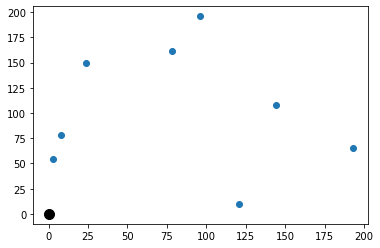

In [86]:
import matplotlib.pyplot as plt
plt.scatter([i[0] for i in dataset],[i[1] for i in dataset])
plt.scatter(titikasal[0],titikasal[1],c='black',s=100)

# Proses

In [87]:
def jarak(A,B):
    h=((A[0]-B[0])**2+(A[1]-B[1])**2)**(1/2)
    return h

def crosover1(n,data1,data2):
    data1temp=list(data1[:n])
    data2temp=list(data2[:n])
    for i in range(len(data1)):
        if data2[(i+n)%len(data1)] not in data1[:n]:
            data1temp.append(data2[(i+n)%len(data2)])
        if data1[(i+n)%len(data1)] not in data2[:n]:
            data2temp.append(data1[(i+n)%len(data1)])
    return list([data1temp, data2temp])

def GA(dataset,asal):
    from random import shuffle, randint, random
    
    # Populasi(dataset,asal)
    banyak=48
    populasi1=list([])
    lokasi2=list(dataset)
    for i in range(banyak):
        asal2=list([asal])
        shuffle(lokasi2)
        asal2.extend(lokasi2)
        populasi1.append(asal2)
    ## return populasi1
    
    #beda=True
    count=0
    while count<1000:
        # jarak dari populasi asal (populasi)
        fitnes1=list([])
        for i in populasi1:
            jarak2=0
            for j in range (len(i)):
                jarak3=jarak(i[j],i[(j+1)%len(i)])
                jarak2+=jarak3
            fitnes1.append(jarak2)
        ## dihasilkan jarak1
        
        populasiterpilih=list([])
        # Seleksi(peluang,datajarak,populasi):
        for i in range(0,len(fitnes1),2):
            if fitnes1[i]<fitnes1[(i+1)]:
                populasiterpilih.append(populasi1[i])
            elif fitnes1[i]>=fitnes1[i+1]:
                populasiterpilih.append(populasi1[i+1])
        ## return populasiterpilih
        
        r=random()
        # Crosover(data,peluang):
        if r<0.95:
            n=randint(0,len(populasiterpilih)-1)
            for i in range (0,len(populasiterpilih),2):
                h=crosover1(n,populasiterpilih[i],populasiterpilih[(i+1)%len(populasiterpilih)])
                populasiterpilih[i],populasiterpilih[(i+1)%len(populasiterpilih)]=h[0],h[1]
        ## dihasilkan populasi terpilih
        
        # Mutasi(data,peluang):
        if r<0.01:
            n=[randint(1,len(populasiterpilih[0])-1),randint(1,len(populasiterpilih[0])-1)]
            for i in range (len(populasiterpilih)):
                populasiterpilih[i][n[0]],populasiterpilih[i][n[1]]=populasiterpilih[i][n[1]],populasiterpilih[i][n[0]]
        ## dihasilkan populasi terpilih
        if r>=0.95:
            populasiterpilih=list(populasi1)
        
        # penggantian populasi1
        jarak2=list(fitnes1)
        jarak2.sort()
        jarak2.reverse()
        jmax=list(jarak2[:int(len(jarak2)/2)])
        n=0
        for i in range(len(fitnes1)):
            if fitnes1[i] in jmax and jmax[n]>=fitnes1[i]:
                populasi1[i]=populasiterpilih[n]
                n+=1
            if n==len(jmax):
                break
        
        #fitnes1.sort()
        #if fitnes1[0]==fitnes1[len(fitnes1)-1]:
            #beda=False
        count+=1
    
    #return
    fitnes1=list([])
    for i in populasi1:
        jarak2=0
        for j in range (len(i)):
            jarak3=jarak(i[j],i[(j+1)%len(i)])
            jarak2+=jarak3
        fitnes1.append(jarak2)
    a=min(fitnes1)
    b=0
    for i in range(len(fitnes1)):
        if fitnes1[i]==a:
            b=i
    return populasi1[b]
    #return count

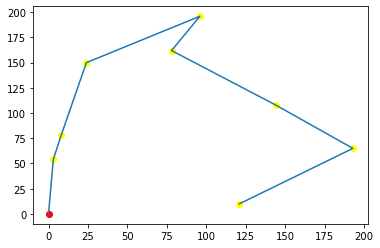

In [88]:
populasi=GA(dataset,titikasal)

import matplotlib.pyplot as plt
plt.plot([i[0] for i in populasi],[i[1] for i in populasi])
plt.scatter(titikasal[0],titikasal[1],c='red')
plt.scatter([i[0] for i in dataset],[i[1] for i in dataset],c='yellow')

In [20]:
data1=[i for i in range(10)]
data1.reverse()
data1

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [21]:
data2=list(data1[:int(len(data1)/2)])
data2

[9, 8, 7, 6, 5]

In [14]:
cr=crosover1(3,data1,data2)
print(cr[0])
print(cr[1])

[0, 1, 2, 6, 5, 4, 3, 9, 8, 7]
[9, 8, 7, 3, 4, 5, 6, 0, 1, 2]
